In [ ]:
!nvidia-smi


Fri Jan 10 04:21:42 2025       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   57C    P0              27W /  70W |    641MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
import tensorflow as tf

In [ ]:
mnist = tf.keras.datasets.fashion_mnist

In [ ]:
(training_images, training_labels), (testing_images, testing_labels) = mnist.load_data()

In [ ]:
print("no: of training images: ", len(training_images))
print("no: of testing images: ", len(testing_images))

no: of training images:  60000
no: of testing images:  10000


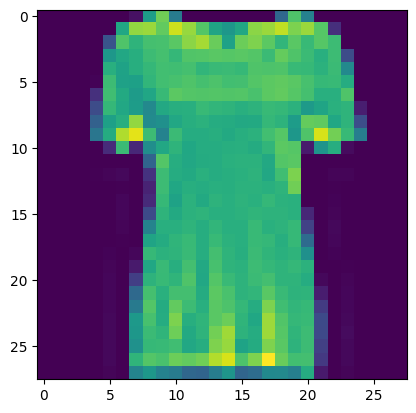

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(training_images[10])

In [ ]:
# normalisation

training_images = training_images / 255.0
testing_images = testing_images / 255.0

In [ ]:
#model
'''
relu activation = max(0,x)


# if 0, that node doesn't work
'''

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(), # input layer
    tf.keras.layers.Dense(units=128, activation=tf.nn.relu), #hidden layer #relu is an activation function
    tf.keras.layers.Dense(units=10, activation=tf.nn.softmax) # output layer # if we have 10 values, it checks the accuracy of all  10 nodes; softmax returns the value of the highest accuracy
])



In [ ]:
'''

loss function
---------------

MSE - MEAN SQUARED ERROR -used for regression tasks

MAE - MEAN ABSOLUTE ERROR - used for regression tasks

binary cross entropy - binary classification

categorical cross entropy - multiclass classification
                          - should be one hot encoded (true class labels)

sparse categorical cross entropy - multi class classification
                                 - for not one hot encoded (integer class labels)

'''

'\n\nloss function\n---------------\n\nMSE - MEAN SQUARED ERROR -used for regression tasks\n\nMAE - MEAN ABSOLUTE ERROR - used for regression tasks\n\nbinary cross entropy - binary classification\n\ncategorical cross entropy - multiclass classification\n                          - should be one hot encoded (true class labels)\n\nsparse categorical cross entropy - multi class classification\n                                 - for not one hot encoded (integer class labels)\n\n'

In [ ]:
'''optimizers
  -------------

  Adam (usually used)
  gradient descent
  stochastic gradient descent

  adagrad (we don't use)
'''

"optimizers\n  -------------\n\n  Adam (usually used)\n  gradient descent\n  stochastic gradient descent\n\n  adagrad (we don't use)\n"

In [ ]:
#compiling

model.compile(optimizer = "adam", loss="sparse_categorical_crossentropy", metrics= ["accuracy"])

In [ ]:
'''
for each epochs:
  if accuracy increases and loss decreases:
    model = success
  else
    model = failed
'''

'\nfor each epochs:\n  if accuracy increases and loss decreases:\n    model = success\n  else\n    model = failed\n'

In [ ]:
#training

model.fit(training_images, training_labels, epochs = 20)


Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7782 - loss: 0.6302
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8596 - loss: 0.3869
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8756 - loss: 0.3437
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8865 - loss: 0.3135
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8900 - loss: 0.2964
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8965 - loss: 0.2783
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9011 - loss: 0.2675
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.9040 - loss: 0.2576
Epoch 9/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.9071 - loss: 0.2495
Epoch 10/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9130 - loss: 0.2360
Epoch 11/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9121 - loss: 0.2333
Epoch 12/20
1875/1875 ━━━━━━━━

In [ ]:
test_loss, test_acc = model.evaluate(testing_images, testing_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8779 - loss: 0.3890


In [ ]:
print("testing accuracy: ", test_acc )
print("testing loss: ", test_loss)

testing accuracy:  0.8776999711990356
testing loss:  0.3775734305381775


In [ ]:
model.save("mnist_model.h5") # extension for neural networks is h5